In [126]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

In [127]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [128]:
def gradient_descent(X, y, w1, w2, learning_rate, iterations):
    n = len(y)
    for i in range(iterations):
        w1 = w1 - (learning_rate / n) * (X.T @ (sigmoid(X @ w1) - y))  # log-loss

        w2 = w2 - learning_rate / (2 * n) * (-2 * X.T @ y + 2 * X.T @ sigmoid(X @ w2))  # MSE

    return w1, w2

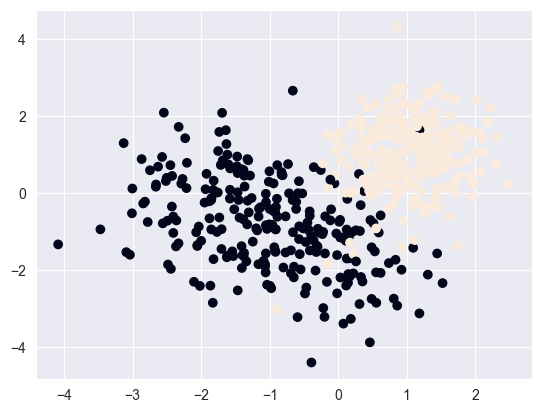

In [129]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1)

y = y[:, np.newaxis]

plt.scatter(X[:, 0], X[:, 1], c=y)


In [130]:
X.shape

(500, 2)

In [131]:
X = np.hstack((np.ones((len(y), 1)), X))
w1 = np.zeros((np.size(X, 1), 1))
w2 = np.zeros((np.size(X, 1), 1))

In [132]:
w1, w2 = gradient_descent(X, y, w1, w2, 0.03, 1500)

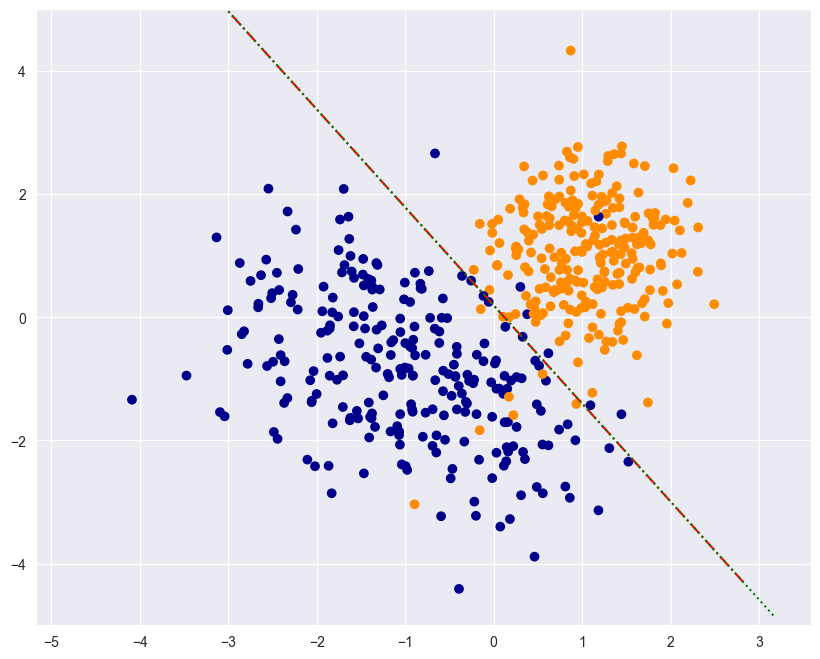

In [133]:
slope1 = -(w1[1] / w1[2])
intercept1 = -(w1[0] / w1[2])

slope2 = -(w2[1] / w2[2])
intercept2 = -(w2[0] / w2[2])

plt.figure(figsize=(10, 8))
plt.ylim((-5, 5))
plt.scatter(X[:, 1], X[:, 2], c=list(map(lambda x: 'darkblue' if x == 0 else 'darkorange', y)))

ax = plt.gca()

x_vals1 = np.array(ax.get_xlim())
y_vals1 = intercept1 + (slope1 * x_vals1)
plt.plot(x_vals1, y_vals1, 'r-.')

x_vals2 = np.array(ax.get_xlim())
y_vals2 = intercept2 + (slope2 * x_vals2)
plt.plot(x_vals2, y_vals2, 'g:')
plt.show()